#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

##Loading Data

In [ ]:
df = pd.read_csv("/content/WALMART_SALES_DATA.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


extract more features from time

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.0
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.0
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.0
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.0
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.0


Check for any missing values

In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64


#EDA

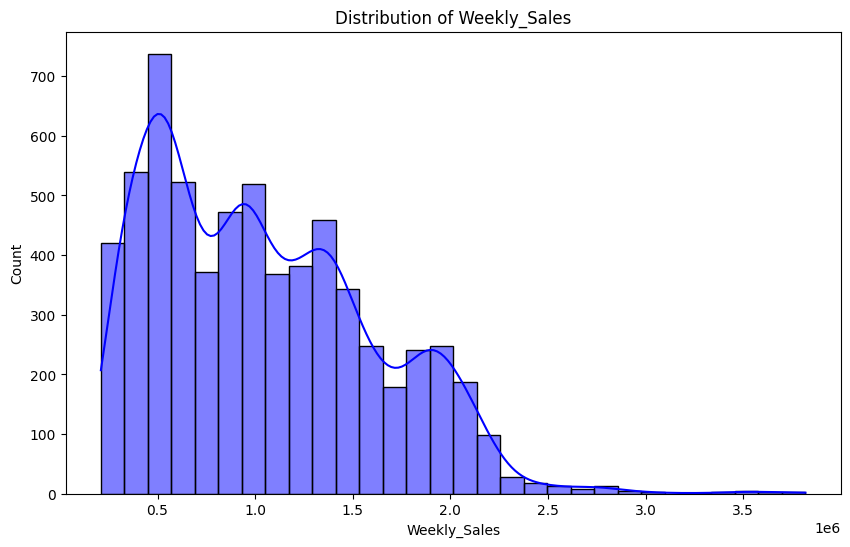

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], kde=True, bins=30, color='blue')
plt.title("Distribution of Weekly_Sales")
plt.show()

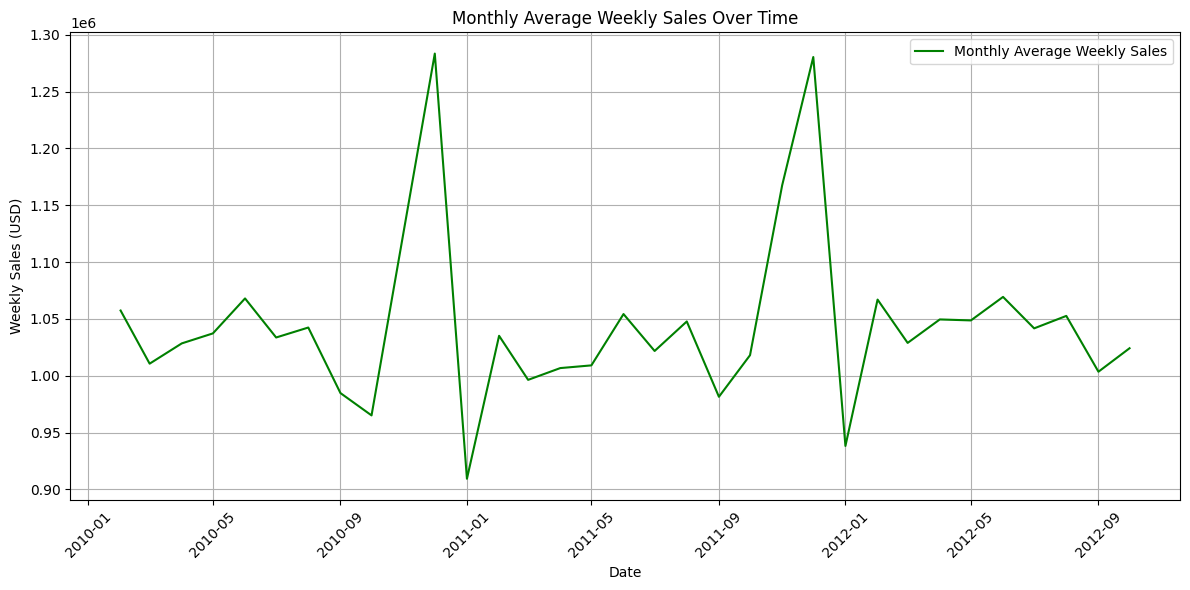

In [ ]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
monthly_avg_sales = df.groupby('Date')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_sales['Date'], monthly_avg_sales['Weekly_Sales'], label='Monthly Average Weekly Sales', color='g')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (USD)')
plt.title('Monthly Average Weekly Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

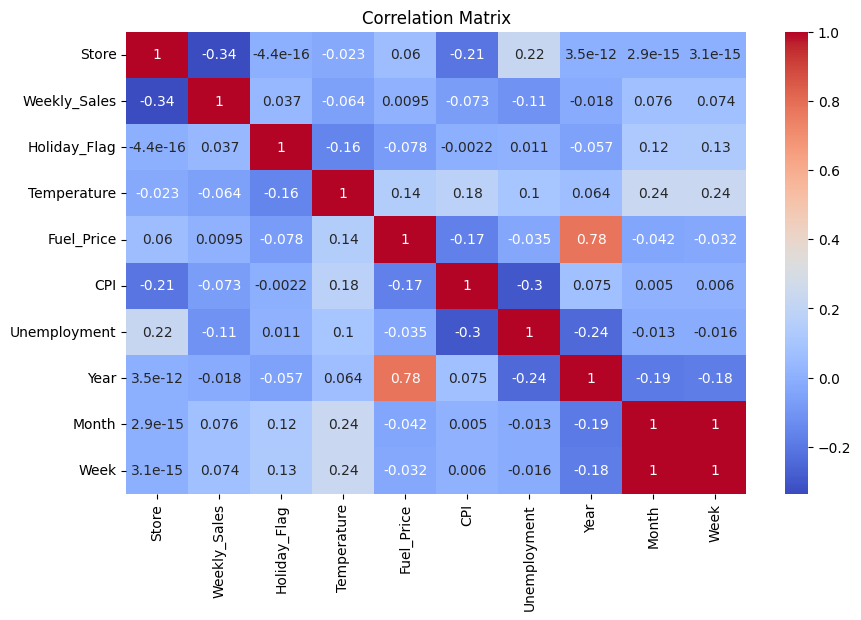

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

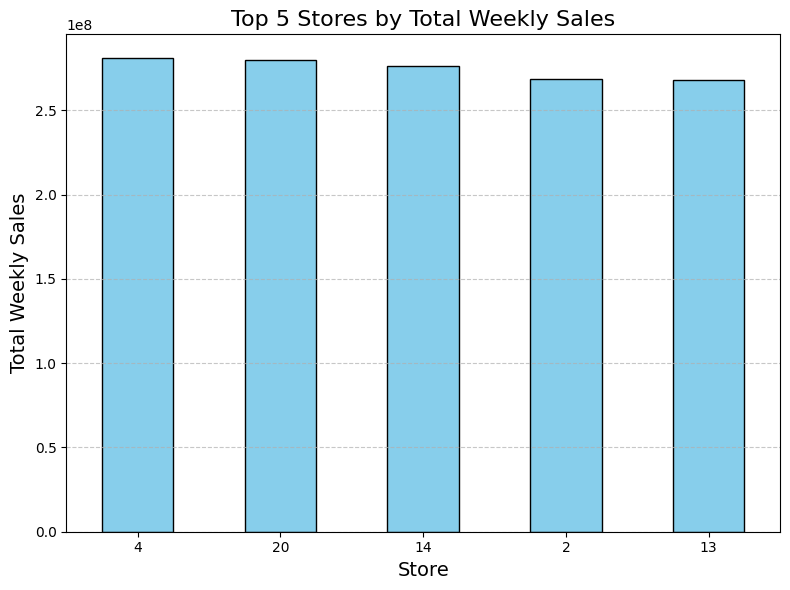

In [ ]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(5)

plt.figure(figsize=(8, 6))
top_stores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Stores by Total Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

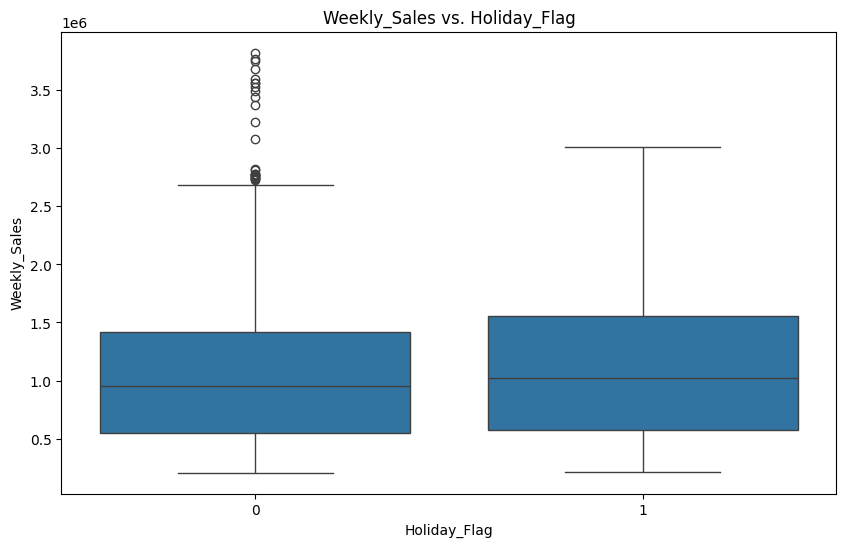

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Weekly_Sales vs. Holiday_Flag")
plt.show()

##Dealing with outliers

In [ ]:
q1 = df['Weekly_Sales'].quantile(0.25)
q3 = df['Weekly_Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

#Machine Learning

In [ ]:
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 11764735011.17
Root Mean Squared Error: 108465.36
R^2 Score: 0.96


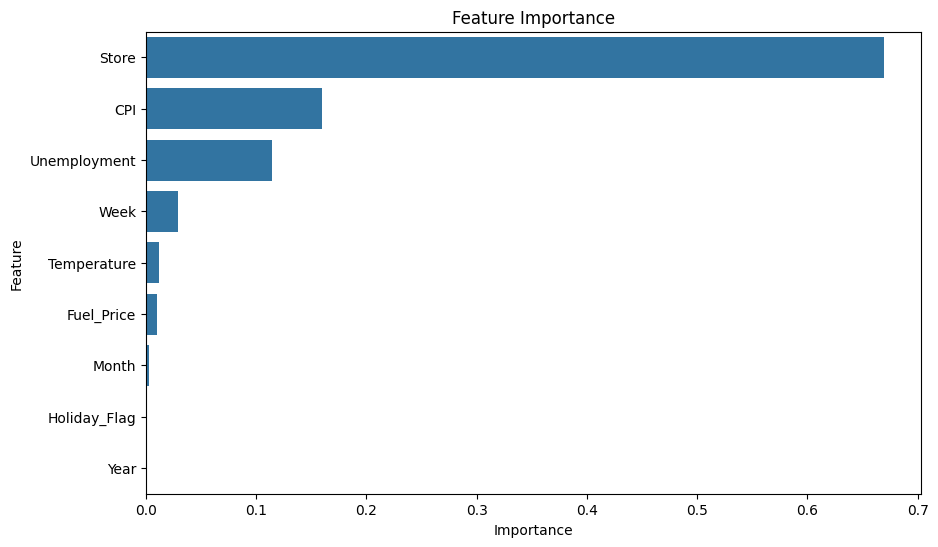

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

In [ ]:
new_data = pd.DataFrame({
    "Store": [1],
    "Holiday_Flag": [0],
    "Temperature": [45],
    "Fuel_Price": [2.6],
    "CPI": [210],
    "Unemployment": [8.1],
    "Year": [2010],
    "Month": [3],
    "Week": [10]
})
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Predicted Weekly Sales:", prediction[0])

Predicted Weekly Sales: 1519111.0747000023
